In [88]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [89]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [90]:
playstore.duplicated(subset = 'App', keep= "first")

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [91]:
playstore.drop([10472], inplace=True)

In [92]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [93]:
playstore.Category = playstore.Category.astype('category')

In [94]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [95]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',', ''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+', ''))
# bagian untuk mengubah tipe data Installs
playstore.Installs = playstore.Installs.astype('int64')

In [96]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [97]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [98]:
# pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float
playstore.Price = playstore.Price.apply(lambda x: x.replace('$', ''))
playstore.Price = playstore.Price.astype('float')

In [99]:
# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore.Reviews = playstore.Reviews.astype('int64')
playstore.Size = playstore.Size.astype('int64')
playstore.Installs = playstore.Installs.astype('int64')


In [100]:
# Statistik
# Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category.

# Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
# sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category 
df2 = playstore.copy()
top_category = pd.crosstab(
    index=df2['Category'], 
    columns='Jumlah',
    values=df2['App'],
    aggfunc='count'
).sort_values(by='Jumlah', ascending=False).reset_index()


In [101]:
#most categories
top_category.Category.iloc[0]

'FAMILY'

In [102]:
#total
top_category.Jumlah.iloc[0]

1972

In [ ]:
# rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
        # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
        # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
        # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini
    

In [ ]:
rev_table : df2.groupby(['Category', 'App', 'Rating']).Reviews.sum().sort_values(ascending=False).reset_index().head(10).loc[:,['Category', 'App', 'Reviews', 'Rating']]

In [ ]:
    ## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
    cat_order = df2.groupby(_______).agg({
    _________ : _________
        }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
    X = _____________
    Y = _____________
    my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
    plt.barh(____,_____, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 

In [ ]:
cat_order = df2.groupby('Category').agg({
    'App' : 'count'
    }).rename({'Category':'Total'}, axis=1).sort_values(by='App', ascending=False).reset_index().head()
X = cat_order['Category']
Y = cat_order['App']
my_colors = 'rgbkymc'    
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X, Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 


In [ ]:
# bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
result = str(figdata_png)[2:-1]

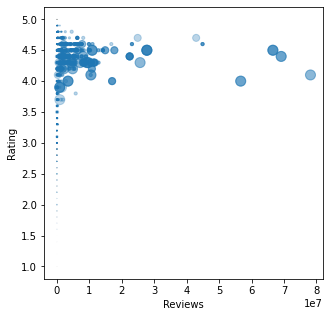

In [107]:
## Scatter Plot
# Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
# Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
X = playstore['Reviews'].values # axis x
Y = playstore['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X, y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")


In [108]:
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result2 = str(figdata_png)[2:-1]

<Figure size 432x288 with 0 Axes>

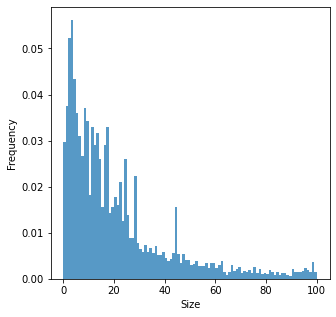

In [111]:
## Histogram Size Distribution
# Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
# Histogram yang terbentuk terbagi menjadi 100 bins
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(x=X, bins=100, density=True, alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")


In [112]:
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result3 = str(figdata_png)[2:-1]


<Figure size 432x288 with 0 Axes>

<ipython-input-113-1b676f20fb16>:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(X, Y, color=my_colors)


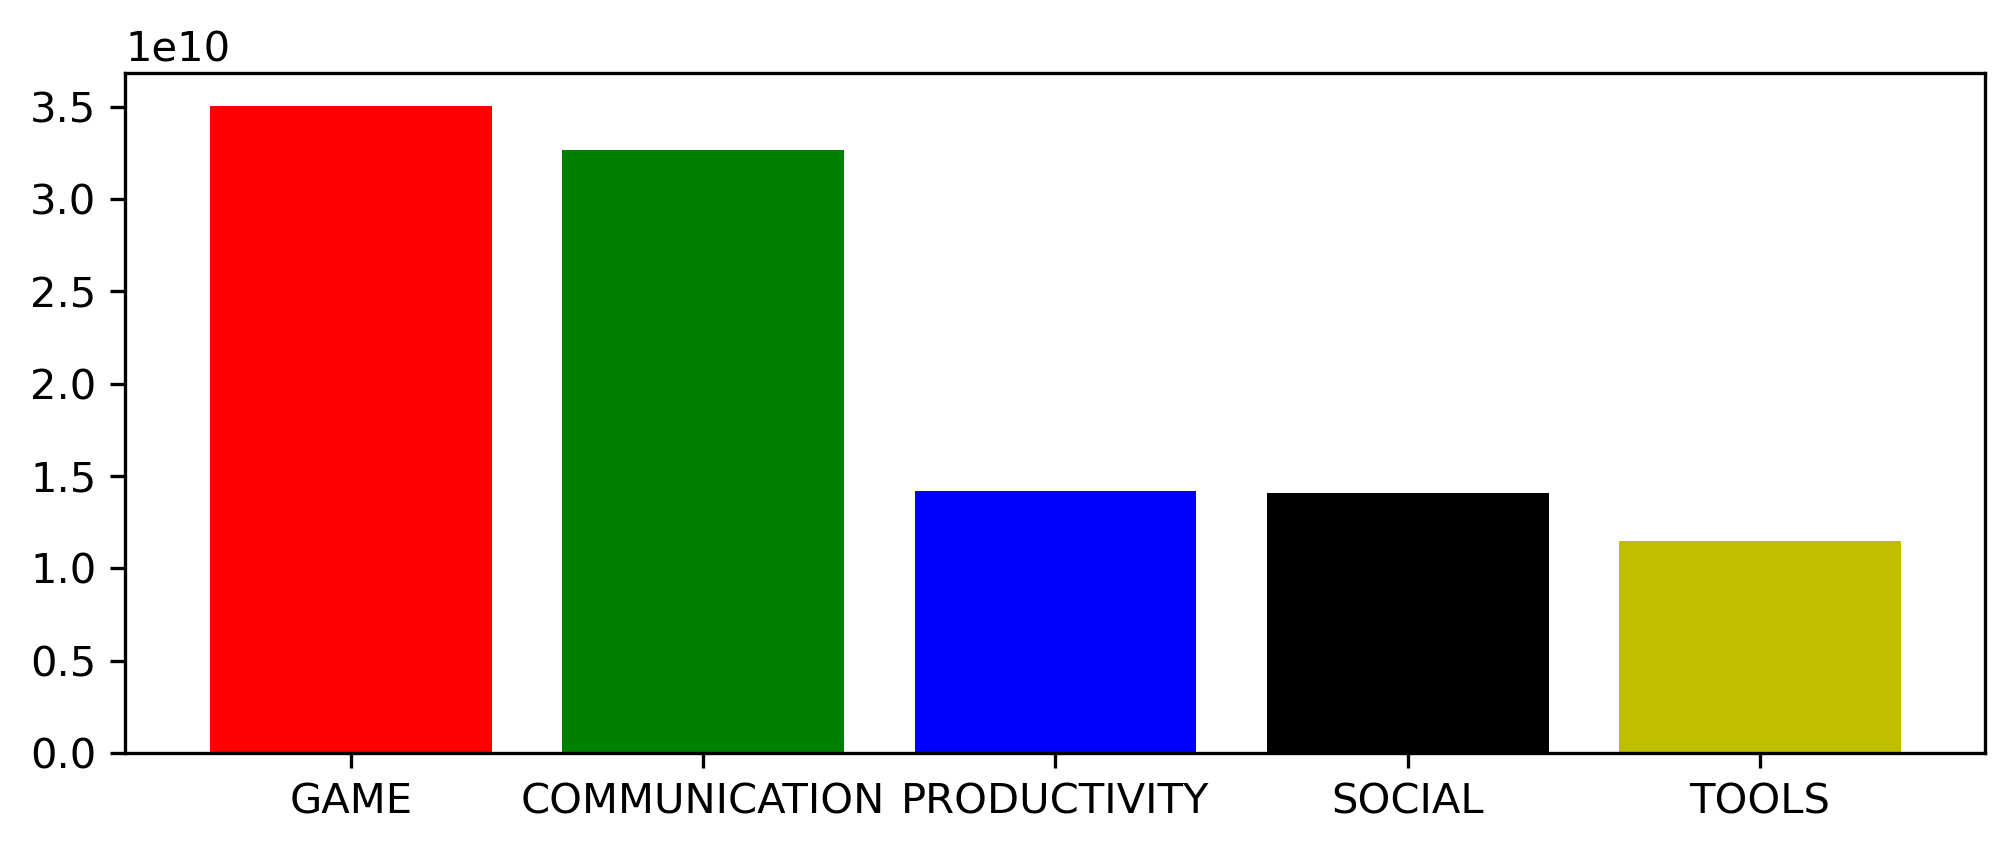

In [113]:
free_paid = pd.pivot_table(
    data=playstore,
    index='Category', 
    columns='Type', 
    values='Installs',
    aggfunc='sum',
    margins=True,
    margins_name='Total').sort_values(by='Total', ascending=False).reset_index().iloc[1:6, 0:3]
X = free_paid['Category']
Y = free_paid['Free']
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.bar(X, Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('free_paid.png',bbox_inches="tight")